In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time_series_transform.base as base
from time_series_transform.util import *
from time_series_transform.stock_transform.base import *
from time_series_transform.stock_transform.stock_extractor import *
from time_series_transform.stock_transform.plot import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df = pd.read_csv('Data/aapl_stock_extract.csv')
df2 = pd.read_csv('Data/googl_stock_extract.csv')

stock = Stock('aapl',df)
stock2 = Stock('googl',df2)

port = Portfolio([stock,stock2])
port.make_technical_indicator('High','mvg10',moving_average,1,50,windowSize = 10)
port.make_technical_indicator('High','fft',rfft_transform,1,50)

In [5]:
se = Stock_Extractor('googl', 'yahoo')
stock = se.get_stock_date('2015-06-24', '2020-07-24')
# stock.save(r"C:\Users\User\Documents\Development\Time-Series-Transformer\Data")

In [11]:
stock.make_technical_indicator('Close','mvg10',moving_average,windowSize = 10)
stock.make_technical_indicator('Close','mvg30',moving_average,windowSize = 30)
stock.make_technical_indicator('Close','fft',rfft_transform)
stock.make_technical_indicator('Close','stochastic_oscillator',stochastic_oscillator)

stock.dataFrame

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,symbol,mvg10,mvg30,fft,stochastic_oscillator_k_val,stochastic_oscillator_d_val
0,2015-06-23,559.79,564.90,557.15,563.39,1569800,0,0,googl,NaN,NaN,NaN,NaN,NaN
1,2015-06-24,562.48,562.64,556.81,558.57,1446200,0,0,googl,NaN,NaN,1005.726307,NaN,NaN
2,2015-06-25,560.30,563.14,557.46,557.95,1334200,0,0,googl,NaN,NaN,980.515006,NaN,NaN
3,2015-06-26,559.71,560.00,551.85,553.06,2183800,0,0,googl,NaN,NaN,955.669866,NaN,NaN
4,2015-06-29,546.75,550.90,540.24,541.25,1887800,0,0,googl,NaN,NaN,931.265568,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,2020-07-17,1516.91,1523.43,1498.10,1516.85,1713200,0,0,googl,1513.258,1460.296000,1134.483729,54.858423,57.916657
1277,2020-07-20,1515.00,1569.01,1502.70,1563.84,1508300,0,0,googl,1519.677,1464.423333,1108.647869,100.000000,68.595097
1278,2020-07-21,1585.03,1587.05,1552.62,1555.92,1377700,0,0,googl,1526.277,1468.019333,1082.769912,84.654137,79.837520
1279,2020-07-22,1555.71,1566.98,1543.23,1564.85,1224100,0,0,googl,1532.402,1471.778333,1056.934796,100.000000,94.884712


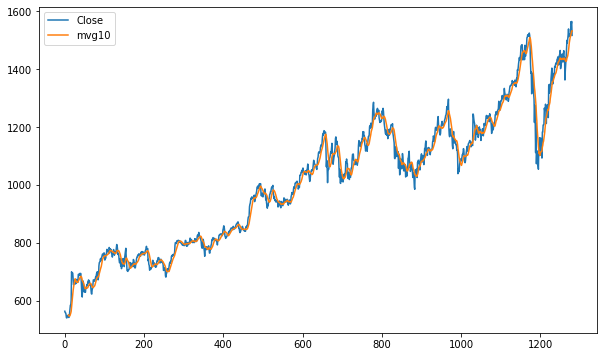

In [20]:
stock.plot(['Close', 'mvg10'], figsize=(10,6))

In [2]:
pe = Portfolio_Extractor(['shop.to','0051.TW','0050.TW'],'yahoo')
port = pe.get_portfolio_period('1y')

In [3]:
port.make_technical_indicator('High','mvg10',moving_average,1,50,windowSize = 10)
port.make_technical_indicator('High','fft',rfft_transform,1,50)
port.make_technical_indicator('High','wavelet',wavelet_denoising,1,50,wavelet='haar')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

In [66]:
port.get_portfolio_dataFrame()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,mvg10,fft,wavelet,symbol
0,2019-07-17,1150.92,1158.44,1146.62,1146.74,976900,0.0,0,NaN,NaN,1165.329688,googl
1,2019-07-18,1142.00,1148.17,1132.86,1147.24,1273800,0.0,0,NaN,1307.700664,1165.329688,googl
2,2019-07-19,1149.32,1151.58,1131.25,1131.55,1159200,0.0,0,NaN,1243.912627,1165.329688,googl
3,2019-07-22,1135.47,1140.02,1125.21,1139.21,1445700,0.0,0,NaN,1192.537373,1165.329688,googl
4,2019-07-23,1143.45,1148.86,1132.85,1148.05,1032400,0.0,0,NaN,1158.217926,1135.914688,googl
...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-09,385.05,385.27,378.69,383.01,31410700,0.0,0,371.747,395.668925,393.248750,aapl
249,2020-07-10,381.34,383.92,378.82,383.68,22564300,0.0,0,373.639,385.523832,393.248750,aapl
250,2020-07-13,389.06,399.82,381.03,381.91,47912300,0.0,0,377.089,368.148149,393.248750,aapl
251,2020-07-14,379.36,389.02,375.51,388.23,42747300,0.0,0,379.774,344.380404,393.248750,aapl


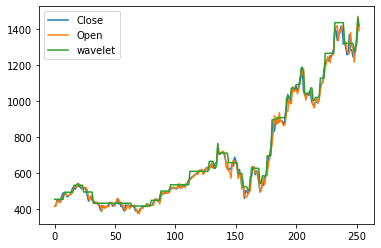

In [22]:
port.plot({'shop.to':['Close','Open','wavelet']},samePlot= False)

In [5]:
npx = stock.df['Close'].to_numpy()
type(ema(npx, span = 10))

numpy.ndarray

In [14]:
macdout = macd(npx)
for i in macdout:
    print(type(macdout[i]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
so = stochastic_oscillator(npx)
type(so['k_val'])
type(so['d_val'])

numpy.ndarray

In [17]:
# stock.make_technical_indicator('Close','fft',rfft_transform)
stock.df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,fft
0,2020-01-02,94.00,94.92,94.00,94.58,4882015,0.0,0,NaN
1,2020-01-03,95.21,95.59,93.95,94.58,6813547,0.0,0,96.493010
2,2020-01-06,94.00,94.04,93.37,93.37,9321768,0.0,0,94.952319
3,2020-01-07,93.41,93.66,92.40,93.08,6328602,0.0,0,94.001218
4,2020-01-08,92.20,93.17,92.06,92.64,8516995,0.0,0,93.714951
...,...,...,...,...,...,...,...,...,...
126,2020-07-20,97.20,97.35,96.25,97.05,9486407,0.0,0,98.420293
127,2020-07-21,97.15,99.10,97.10,98.70,24740975,0.0,0,99.426783
128,2020-07-22,98.55,99.25,98.35,98.95,7243893,0.0,0,99.919875
129,2020-07-23,98.85,98.90,98.10,98.85,6008972,0.0,0,99.500974


In [24]:
colList = ['Open', 'High', 'Low', 'Close', 'Volume']
for c in colList:
    port.make_technical_indicator(c,'ma5',moving_average,windowSize = 5)
    port.make_technical_indicator(c,'ma10',moving_average,windowSize = 10)
port.get_portfolio_dataFrame()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_mvg10,High_fft,...,Open_ma10,High_ma5,High_ma10,Low_ma5,Low_ma10,Close_ma5,Close_ma10,Volume_ma5,Volume_ma10,symbol
0,2019-07-16,202.18,203.68,201.10,202.09,16866800,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aapl
1,2019-07-17,201.64,202.67,200.87,200.95,14107500,0.0,0,NaN,285.600897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aapl
2,2019-07-18,201.59,203.45,201.30,203.23,18582200,0.0,0,NaN,255.962488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aapl
3,2019-07-19,203.36,204.06,199.97,200.20,20929300,0.0,0,NaN,229.843708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aapl
4,2019-07-22,201.25,204.79,201.21,204.78,22277900,0.0,0,NaN,209.426162,...,NaN,203.730,NaN,200.890,NaN,202.250,NaN,18552740.0,NaN,aapl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-10,1513.25,1541.34,1500.72,1539.01,1795900,0.0,0,1480.899,1569.985723,...,1456.912,1522.594,1480.899,1491.058,1441.412,1510.168,1464.053,1965960.0,2394980.0,googl
249,2020-07-13,1549.94,1576.36,1506.56,1512.23,2147700,0.0,0,1494.833,1545.718671,...,1468.643,1535.866,1494.833,1496.974,1456.568,1512.684,1479.022,1948380.0,2121550.0,googl
250,2020-07-14,1492.79,1522.80,1485.93,1520.86,1905400,0.0,0,1507.313,1502.809935,...,1481.888,1536.162,1507.313,1496.220,1469.996,1518.872,1491.391,1905820.0,2086720.0,googl
251,2020-07-15,1523.23,1536.33,1497.83,1516.88,1551300,0.0,0,1518.546,1444.679980,...,1494.523,1541.194,1518.546,1497.326,1481.086,1521.528,1501.274,1898420.0,2040420.0,googl


In [9]:
# pp = Plot(stock)
# pp.add_line('mvg10', 'purple', 'mvg10')
pp.add_macd()
pp.show()

ValueError: macd already exists

In [11]:
# pp.remove_line('mvg10')
pp.remove_subplot('macd')
pp.show()

KeyError: 'macd'

In [6]:
pp.fig.layout

Layout({
    'legend': {'orientation': 'h', 'x': 0.3, 'y': 0.9, 'yanchor': 'bottom'},
    'margin': {'b': 40, 'l': 40, 'r': 40, 't': 40},
    'plot_bgcolor': 'rgb(250, 250, 250)',
    'template': '...',
    'xaxis': {'anchor': 'y2',
              'rangebreaks': [{'bounds': ['sat', 'mon']}, {'values': ['2015-12-25', '2016-01-01']}],
              'rangeselector': {'visible': True}},
    'yaxis': {'domain': [0.1, 0.85], 'showticklabels': True},
    'yaxis2': {'domain': [0.0, 0.1], 'showticklabels': False}
})

In [22]:
layout = {
            'plot_bgcolor' : 'rgb(250, 250, 250)',
            'xaxis' : dict( anchor = 'y1', domain = [0,1.0], rangeselector = dict( visible = True ), showticklabels = True ),
            'xaxis2' : dict( anchor = 'y3', domain = [0,1.0] ,rangeselector = dict( visible = False ), showticklabels = True ),
            'yaxis' : dict( anchor = 'x1', domain = [0.2, 0.3], showticklabels = False ),
            'yaxis2' : dict( anchor = 'x1',domain = [0.3, 0.9] ),
            'yaxis3' : dict( anchor = 'x2', domain = [0, 0.15], showticklabels = True ),
            'legend' : dict( orientation = 'h', y=0.9, x=0.3, yanchor='bottom' ),
            'margin' : dict( t=40, b=40, r=40, l=40 )
        }
ret.update_layout(layout)
ret.show()

In [19]:
ret.add_trace(go.Scatter(
                x= stock.df['Date'],
                y= md['EMA_12'],
                mode="lines",
                line=go.scatter.Line(color='black'),
                showlegend=True,
                yaxis = 'y3',
                name = 'ema12'))
ret.show()

In [5]:
fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.02)

fig.add_trace(go.Scatter(x=[0, 1, 2], y=[10, 11, 12]),
              row=3, col=1)

fig.add_trace(go.Scatter(x=[2, 3, 4], y=[100, 110, 120]),
              row=2, col=1)

fig.add_trace(go.Scatter(x=[3, 4, 5], y=[1000, 1100, 1200]),
              row=1, col=1)

fig.update_layout(height=600, width=600,
                  title_text="Stacked Subplots with Shared X-Axes")
fig.show()

In [6]:
fig.layout

Layout({
    'height': 600,
    'template': '...',
    'title': {'text': 'Stacked Subplots with Shared X-Axes'},
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'matches': 'x3', 'showticklabels': False},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0], 'matches': 'x3', 'showticklabels': False},
    'xaxis3': {'anchor': 'y3', 'domain': [0.0, 1.0]},
    'yaxis': {'anchor': 'x', 'domain': [0.68, 1.0]},
    'yaxis2': {'anchor': 'x2', 'domain': [0.34, 0.66]},
    'yaxis3': {'anchor': 'x3', 'domain': [0.0, 0.32]}
})

In [8]:
pp.fig.layout

Layout({
    'legend': {'orientation': 'h', 'x': 0.3, 'y': 0.9, 'yanchor': 'bottom'},
    'margin': {'b': 40, 'l': 40, 'r': 40, 't': 40},
    'plot_bgcolor': 'rgb(250, 250, 250)',
    'template': '...',
    'xaxis': {'rangebreaks': [{'bounds': ['sat', 'mon']}, {'values': ['2015-12-25', '2016-01-01']}],
              'rangeselector': {'visible': True}},
    'yaxis': {'domain': [0, 0.8]},
    'yaxis2': {'domain': [0, 0.2], 'showticklabels': False}
})

In [25]:
pp = Plot(stock2)
pp.show()

In [4]:
pp.fig.layout

Layout({
    'legend': {'orientation': 'h', 'x': 0.3, 'y': 0.9, 'yanchor': 'bottom'},
    'margin': {'b': 40, 'l': 40, 'r': 40, 't': 40},
    'plot_bgcolor': 'rgb(250, 250, 250)',
    'template': '...',
    'xaxis': {'anchor': 'y2',
              'rangebreaks': [{'bounds': ['sat', 'mon']}, {'values': ['2015-12-25', '2016-01-01']}],
              'rangeselector': {'visible': True}},
    'yaxis': {'domain': [0.2, 0.8], 'showticklabels': True},
    'yaxis2': {'domain': [0, 0.2], 'showticklabels': False}
})

In [4]:
pp.add_line('mvg10', 'purple', 'mvg10')
pp.show()

In [5]:
pp.add_macd()
pp.show()
pp.fig.layout

Layout({
    'legend': {'orientation': 'h', 'x': 0.3, 'y': 0.9, 'yanchor': 'bottom'},
    'margin': {'b': 40, 'l': 40, 'r': 40, 't': 40},
    'plot_bgcolor': 'rgb(250, 250, 250)',
    'template': '...',
    'xaxis': {'anchor': 'y2',
              'rangebreaks': [{'bounds': ['sat', 'mon']}, {'values': ['2015-12-25', '2016-01-01']}],
              'rangeselector': {'visible': True}},
    'yaxis': {'domain': [0.3, 0.85], 'showticklabels': True},
    'yaxis2': {'domain': [0.2, 0.3], 'showticklabels': False},
    'yaxis3': {'domain': [0.0, 0.15]}
})

In [6]:
pp.remove_subplot()
pp.show()

In [8]:
# pp.remove_line('mvg10')
# pp.show()
pp.fig.data

(Candlestick({
     'close': array([202.09, 200.95, 203.23, ..., 381.91, 388.23, 390.9 ]),
     'high': array([203.68, 202.67, 203.45, ..., 399.82, 389.02, 396.99]),
     'low': array([201.1 , 200.87, 201.3 , ..., 381.03, 375.51, 385.96]),
     'name': 'aapl',
     'open': array([202.18, 201.64, 201.59, ..., 389.06, 379.36, 395.96]),
     'x': array(['2019-07-16', '2019-07-17', '2019-07-18', ..., '2020-07-13',
                 '2020-07-14', '2020-07-15'], dtype=object),
     'yaxis': 'y'
 }),
 Bar({
     'marker': {'color': [#FF0000, #FF0000, #008000, ..., #FF0000, #008000,
                          #008000]},
     'name': 'Volume',
     'x': array(['2019-07-16', '2019-07-17', '2019-07-18', ..., '2020-07-13',
                 '2020-07-14', '2020-07-15'], dtype=object),
     'y': array([16866800, 14107500, 18582200, ..., 47912300, 42747300, 38189300],
                dtype=int64),
     'yaxis': 'y2'
 }),
 Scatter({
     'line': {'color': 'purple'},
     'mode': 'lines',
     'name': 'mv

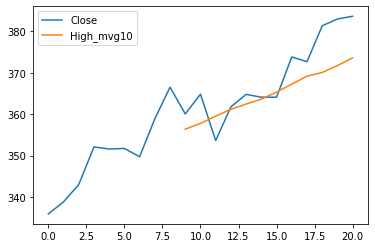

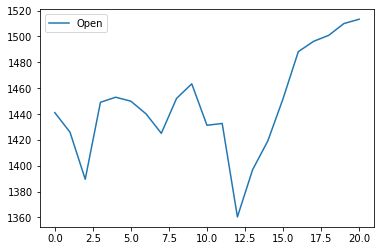

In [5]:
stockIndicators = {
    'aapl':['Close','High_mvg10'],
    'googl':['Open']
}
# port.plot(stockIndicators, samePlot = False)
port.plot(stockIndicators, keyCol = 'Date',samePlot = False)
 

In [3]:
x = stock.df[['Date','Close']].drop(2).set_index('Date')
y = stock.df[['Date', 'Open']].set_index('Date')
w = stock2.df[['Date','High']].set_index('Date')
df = [x,y,w]

# z = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='outer'), df)
# # z = pd.merge(x,y, left_on= 'Date',right_on='Date')
# z
# z.plot()
macd(stock.df['Close'])
# stock.macd_plot('Close')

{'EMA_12': array([202.09      , 201.4725    , 202.15845266, 201.54024569,
        202.42047536, 203.38284816, 204.0137172 , 204.13189169,
        204.36100673, 204.90088985, 205.16055279, 206.11522288,
        206.09000667, 205.32720457, 202.93720356, 201.57263557,
        200.77484571, 200.81614194, 200.58394465, 200.31058427,
        201.41749552, 201.37053683, 201.17393023, 201.74836473,
        202.82827462, 203.73883174, 204.85746288, 205.772519  ,
        205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
        204.94070382, 205.26786636, 205.07995946, 205.45472795,
        206.397489  , 207.19157276, 208.00176137, 209.07360271,
        211.03204803, 212.61315146, 213.28702434, 214.03257642,
        214.78643594, 215.73973038, 216.26920867, 216.22470038,
        216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
        216.96379844, 217.76484934, 218.53648989, 218.33085827,
        218.43996498, 219.47849625, 220.36338937, 220.70749857,
        221.39867858, 222.4512

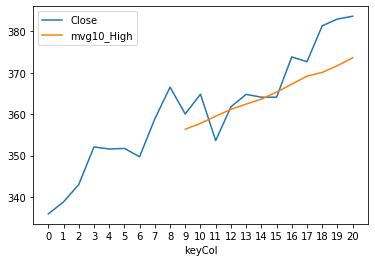

In [22]:

stockIndicators = {
    'aapl':['Date','Close','High_mvg10'],
    'googl':['Open']
}

keyArr = [i for i in range(port.stockDict['aapl'].df.shape[0])]
x = port.stockDict['aapl'].df[stockIndicators['aapl']]
x.insert(0,'keyCol',keyArr)
x = x.set_index('keyCol')
x.plot(xticks=x.index)
# plt.plot(x)
# x

In [7]:
import pandas as pd
import numpy as np
x = [i for i in range(20)]
xx = np.array(x)
df = pd.DataFrame(data = x, columns = ['omg'])
df2 = pd.DataFrame(data = x, columns = ['omg1'])
y = {}
y['1'] = xx
y['2'] = xx
z = y['1'] - y['2']
type(z)

df = pd.DataFrame(x)
z = df.rolling(1)
z

Rolling [window=1,center=False,axis=0]

In [8]:
x = 'ignore'
x.find('ignore')

0

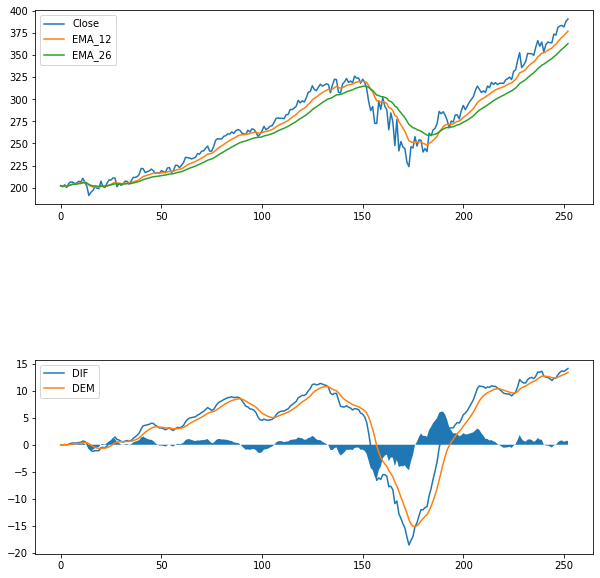

In [23]:
stock.macd_plot('Close')

In [15]:
rsv_day = 9
alpha = 1/3
ret = {}
arr = stock.df['Close'].values
df = pd.DataFrame(arr)

rsv_rolling = df.rolling(rsv_day)
rst= 100*(df - rsv_rolling.min())/(rsv_rolling.max() - rsv_rolling.min())
rst.rolling(3).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,98.087702
249,100.000000
250,96.985181
251,96.985181


In [10]:
from collections import defaultdict

In [4]:
macd(stock.df['Close'])

{'EMA_12': array([[202.09      ],
        [201.4725    ],
        [202.15845266],
        [201.54024569],
        [202.42047536],
        [203.38284816],
        [204.0137172 ],
        [204.13189169],
        [204.36100673],
        [204.90088985],
        [205.16055279],
        [206.11522288],
        [206.09000667],
        [205.32720457],
        [202.93720356],
        [201.57263557],
        [200.77484571],
        [200.81614194],
        [200.58394465],
        [200.31058427],
        [201.41749552],
        [201.37053683],
        [201.17393023],
        [201.74836473],
        [202.82827462],
        [203.73883174],
        [204.85746288],
        [205.772519  ],
        [205.03401096],
        [205.00241422],
        [204.61833991],
        [204.5042049 ],
        [204.94070382],
        [205.26786636],
        [205.07995946],
        [205.45472795],
        [206.397489  ],
        [207.19157276],
        [208.00176137],
        [209.07360271],
        [211.03204803],
      

In [11]:
cc = stock.df['Close']
ema(cc, span = 12).mean().to_numpy()
# cc.ewm(span=12).mean()

array([202.09      , 201.4725    , 202.15845266, 201.54024569,
       202.42047536, 203.38284816, 204.0137172 , 204.13189169,
       204.36100673, 204.90088985, 205.16055279, 206.11522288,
       206.09000667, 205.32720457, 202.93720356, 201.57263557,
       200.77484571, 200.81614194, 200.58394465, 200.31058427,
       201.41749552, 201.37053683, 201.17393023, 201.74836473,
       202.82827462, 203.73883174, 204.85746288, 205.772519  ,
       205.03401096, 205.00241422, 204.61833991, 204.5042049 ,
       204.94070382, 205.26786636, 205.07995946, 205.45472795,
       206.397489  , 207.19157276, 208.00176137, 209.07360271,
       211.03204803, 212.61315146, 213.28702434, 214.03257642,
       214.78643594, 215.73973038, 216.26920867, 216.22470038,
       216.33785492, 216.27509322, 216.7328625 , 216.9463043 ,
       216.96379844, 217.76484934, 218.53648989, 218.33085827,
       218.43996498, 219.47849625, 220.36338937, 220.70749857,
       221.39867858, 222.451223  , 224.27569926, 225.76

In [31]:
# ema(stock.df['Close'], span = 10, adjust = False)
pd.ewma(stock.df['Close'], span=10, adjust = False)

AttributeError: module 'pandas' has no attribute 'ewma'

In [13]:
def strided_app(a, L, S): # Window len = L, Stride len/stepsize = S

    nrows = ((a.size - L) // S) + 1

    n = a.strides[0]

    return np.lib.stride_tricks.as_strided(a, shape=(nrows, L), strides=(S * n, n))

def numpyEWMA(price, windowSize):

    weights = np.exp(np.linspace(-1., 0., windowSize))

    weights /= weights.sum()

    a2D = strided_app(price, windowSize, 1)

    returnArray = np.empty((price.shape[0]))

    returnArray.fill(np.nan)

    for index in (range(a2D.shape[0])):

        returnArray[index + windowSize-1] = np.convolve(weights, a2D[index])[windowSize - 1:-windowSize + 1]

    return np.reshape(returnArray, (-1, 1))

In [20]:
numpyEWMA(stock.df['Close'].to_numpy(), 10)

array([[         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [         nan],
       [203.52959645],
       [203.94272697],
       [204.84692252],
       [205.19496169],
       [205.86328176],
       [205.19933491],
       [204.38582758],
       [203.62241976],
       [203.30515196],
       [202.73047913],
       [201.72306961],
       [201.238784  ],
       [199.60420003],
       [198.51871882],
       [198.34171331],
       [200.21247205],
       [201.66946744],
       [203.07589212],
       [203.87689054],
       [204.50111739],
       [205.50660326],
       [205.02192704],
       [205.63965123],
       [206.70412709],
       [207.05122833],
       [206.59630132],
       [206.28570323],
       [205.77681956],
       [205.23851324],
       [206.39520625],
       [207.16336023],
       [208.8203736 ],
       [210.40559941],
       [211.32414777],
       [212

In [16]:
def ewma_vectorized(data, windowSize, offset=None, dtype=None, order='C', out=None):
    """
    Calculates the exponential moving average over a vector.
    Will fail for large inputs.
    :param data: Input data
    :param alpha: scalar float in range (0,1)
        The alpha parameter for the moving average.
    :param offset: optional
        The offset for the moving average, scalar. Defaults to data[0].
    :param dtype: optional
        Data type used for calculations. Defaults to float64 unless
        data.dtype is float32, then it will use float32.
    :param order: {'C', 'F', 'A'}, optional
        Order to use when flattening the data. Defaults to 'C'.
    :param out: ndarray, or None, optional
        A location into which the result is stored. If provided, it must have
        the same shape as the input. If not provided or `None`,
        a freshly-allocated array is returned.
    """
    alpha = 2/(1+windowSize)
    data = np.array(data, copy=False)
    dtype = np.float32
    
    if data.ndim > 1:
        raise ValueError("data must be an 1D array")
    if data.size < 1:
        # empty input, return empty array
        return out
    offset = data[0]
    out = np.empty_like(data, dtype = dtype)
    
   
    alpha = np.array(alpha, copy=False).astype(dtype, copy=False)
    # scaling_factors -> 0 as len(data) gets large
    # this leads to divide-by-zeros below
    scaling_factors = np.power(1. - alpha, np.arange(data.size + 1, dtype=dtype),
                               dtype=dtype)
    # create cumulative sum array
    np.multiply(data, (alpha * scaling_factors[-2]) / scaling_factors[:-1],
                dtype=dtype, out=out)
    np.cumsum(out, dtype=dtype, out=out)
    # cumsums / scaling
    out /= scaling_factors[-2::-1]
    if offset != 0:
        offset = np.array(offset, copy=False).astype(dtype, copy=False)
        # add offsets
        out += offset * scaling_factors[1:]
    return out

In [17]:
ewma_vectorized(stock.df['Close'].to_numpy(), 10)

array([202.09   , 201.88272, 202.12769, 201.77719, 202.32317, 203.06078,
       203.63336, 203.80548, 204.07538, 204.64532, 204.94983, 205.96442,
       205.96541, 205.17354, 202.60744, 201.16608, 200.35223, 200.47546,
       200.27448, 200.01912, 201.3411 , 201.30092, 201.0862 , 201.7687 ,
       203.02168, 204.04865, 205.29979, 206.29074, 205.33061, 205.23958,
       204.74512, 204.58783, 205.08641, 205.44524, 205.19156, 205.61311,
       206.69617, 207.57869, 208.46439, 209.64539, 211.85352, 213.57104,
       214.19269, 214.90855, 215.63972, 216.6107 , 217.07785, 216.87823,
       216.89311, 216.71797, 217.17834, 217.34956, 217.2969 , 218.18294,
       219.01875, 218.68806, 218.75204, 219.92259, 220.88759, 221.19891,
       221.9264 , 223.07433, 225.11719, 226.7268 , 227.94556, 228.77182,
       229.6115 , 230.50214, 231.97084, 233.07251, 234.55568, 235.84012,
       237.43283, 239.18141, 239.57207, 239.88625, 241.13602, 243.43127,
       245.61287, 247.33052, 248.75589, 250.45847, 

In [18]:
# stock.df['Close'].ewm(span = 10, adjust = False).mean()
# stock.df['Close'].ndim
x = 0.4
np.array(x, copy = True)
np.power(1. - x, np.arange(10 + 1, dtype=np.float32),
                               dtype=np.float32)

array([1.        , 0.6       , 0.36      , 0.21600002, 0.12960002,
       0.07776002, 0.04665601, 0.02799361, 0.01679617, 0.0100777 ,
       0.00604662], dtype=float32)

In [35]:
def dictDIff(d1,d2):
    diffNum = 0
    for i in d1:
        if d1[i] != d2[i]:
            diffNum +=1
    return diffNum
def lookup (df1,df2):
    num = dictDIff(df1.to_dict('records')[0],df2.to_dict('records')[0])
    if num == 0:
        return 1
    elif num ==1:
        return 0
    else:
        return None

In [39]:
d1 = pd.DataFrame([{'a':1,'b':'abc','c':'1'}])
d2 = pd.DataFrame([{'a':1,'b':'abc','c':'1'}])

In [40]:
lookup(d1,d2)

1

In [12]:
class Test(object):
    def __init__(self, x):
            self.x = x
            self._hihi()
            
    def _hihi(self):
        print("123")
        
    def _decorator(func):
        def magic( self ) :
            print ("start magic")
            print(self.x)
            func( self )
            print ("end magic")
            print(self.x)
        return magic

    @_decorator
    def bar( self ) :
        print ("normal call")
        self.x += 10
        print (self.x)
        
    @_decorator
    def fooo( self ) :
        print ("b call")
        self.x += 10
        print (self.x)
     
test = Test(10)

test.bar()
test.fooo()

123
start magic
10
normal call
20
end magic
20
start magic
20
b call
30
end magic
30


In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edge(1,2, length = 10)
G.add_edge(1,3, length = 1)
pos = nx.spring_layout(G,length = 'length',iterations = 150,scale = 1,dim=2)
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos)
plt.show()

TypeError: fruchterman_reingold_layout() got an unexpected keyword argument 'length'